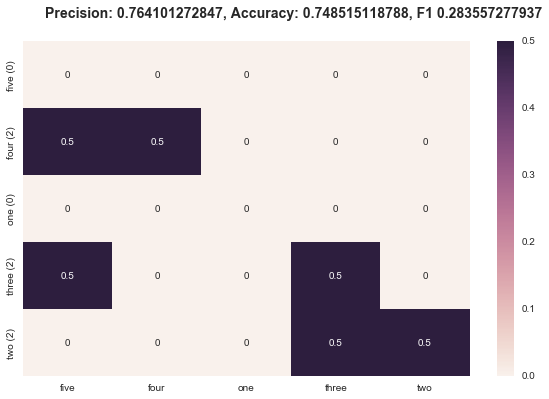

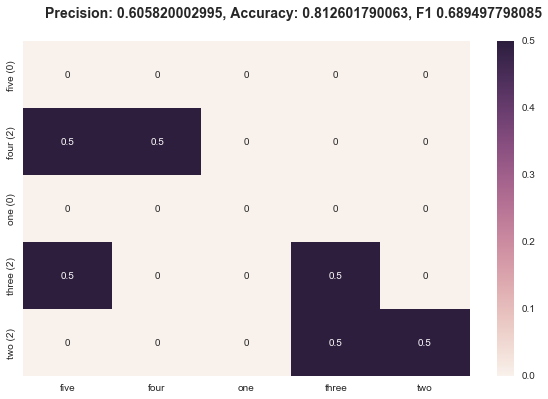

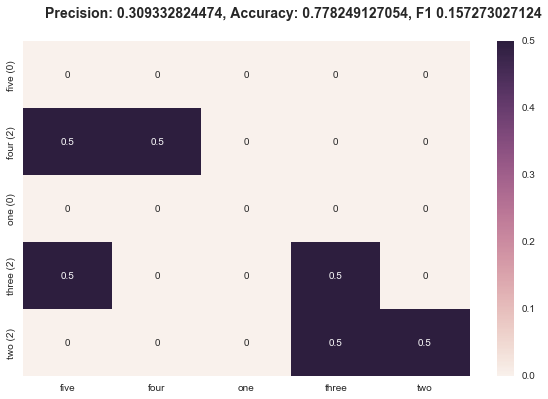

In [61]:
%matplotlib inline
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython import display
from random import uniform
from collections import OrderedDict

def generate_random_matrix(length):
    matrix = []
    for i in range(length):
        row = []
        for j in range(length):
            row.append(uniform(0, 1))
        matrix.append(row)
        
    return matrix




target_dict = {
    "[0, 0, 0, 0, 1]": "one",
    "[0, 0, 0, 1, 0]": "two",
    "[0, 0, 1, 0, 0]": "three",
    "[0, 1, 0, 0, 0]": "four",
    "[1, 0, 0, 0, 0]": "five"
}
target_dict = OrderedDict(target_dict)


prediction = [[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0]]
target = [[1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0]]      

def generate_confusion_matrix(prediction, target, precision, accuracy, f1):
    def generate_prediction_matrix(predictions, targets):
        matrix = np.zeros((len(target_dict), len(target_dict)), dtype=np.float32)
        order = {}

        target_names = target_dict.values()
        target_names.sort()
         
        for index, pred in enumerate(predictions):
            predicted_target = target_dict[str(pred)]
            true_target = target_dict[str(targets[index])]
            
            row = target_names.index(predicted_target)
            col = target_names.index(true_target)
            matrix[row][col] = 1
        
        target_names_with_count = []
        for i in range(len(matrix)):
            row_sum = sum(matrix[i])
            target_names_with_count.append("{} ({})".format(target_names[i], int(row_sum)))
            for j in range(len(matrix[i])):
                matrix[i][j] = matrix[i][j] / row_sum if row_sum != 0 else 0
            
        return matrix, target_names_with_count, target_names
    
    matrix, rows, columns = generate_prediction_matrix(prediction, target)
    df_cm = pd.DataFrame(matrix, 
                         index = [i for i in rows],
                         columns = [i for i in columns])

    title = "Precision: {}, Accuracy: {}, F1 {}".format(precision, accuracy, f1)
    plt.figure(figsize = (10,6))
    plt.suptitle(title, fontsize=14, fontweight='bold')
    confusion = sn.heatmap(df_cm, annot=True)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.savefig("confusion_matrix.png")

for i in range(3):
    generate_confusion_matrix(prediction, target)
    time.sleep(2)
